In [11]:
!pip install kaggle

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faviovaz/marketing-ab-testing")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/faviovaz/marketing-ab-testing/versions/1


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
path = '/root/.cache/kagglehub/datasets/faviovaz/marketing-ab-testing/versions/1'
csv_file = os.path.join(path, 'marketing_AB.csv')

In [16]:
df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [17]:
df.duplicated(subset='user id').sum()

0

In [18]:
df.drop(['Unnamed: 0','user id'], axis = 1, inplace = True)

In [19]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [20]:
df_cat = df[['test group','converted','most ads day','most ads hour']]
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


In [21]:
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


Univariate Analysis

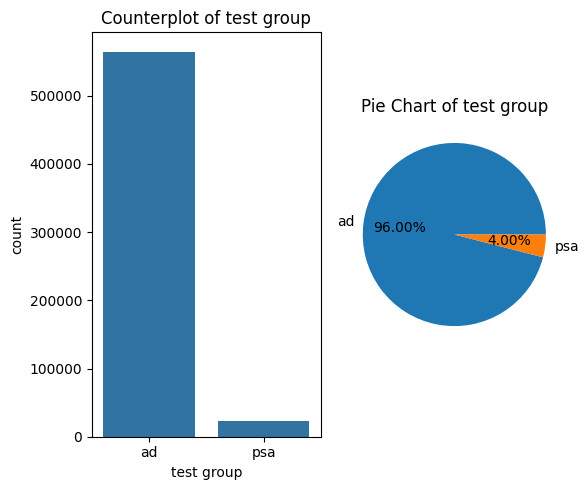

In [22]:
variables = 'test group'

#count plot
plt.figure(figsize=(6,5))
plt.subplot(1,2,1)
sns.countplot(x = variables, data = df_cat)
plt.title(f'Counterplot of {variables}')

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variables].value_counts()
plt.pie(counts,labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variables}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

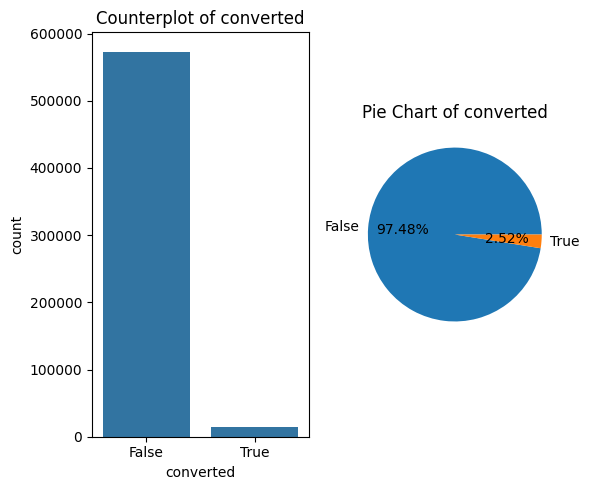

In [23]:
variables = 'converted'

#count plot
plt.figure(figsize=(6,5))
plt.subplot(1,2,1)
sns.countplot(x = variables, data = df_cat)
plt.title(f'Counterplot of {variables}')

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variables].value_counts()
plt.pie(counts,labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variables}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

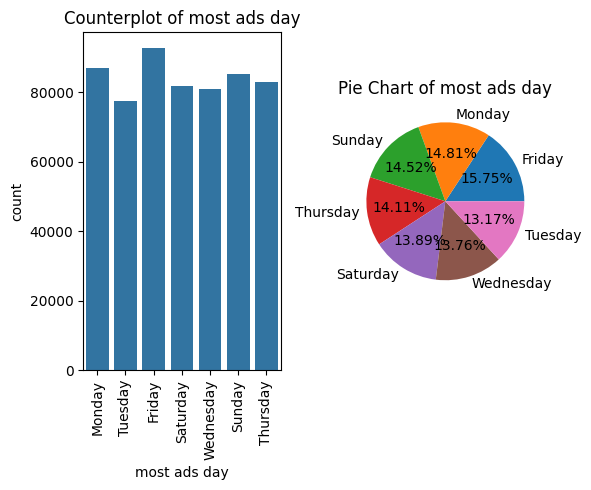

In [24]:
variables = 'most ads day'

#count plot
plt.figure(figsize=(6,5))
plt.subplot(1,2,1)
sns.countplot(x = variables, data = df_cat)
plt.title(f'Counterplot of {variables}')
plt.xticks(rotation=90)

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variables].value_counts()
plt.pie(counts,labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variables}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

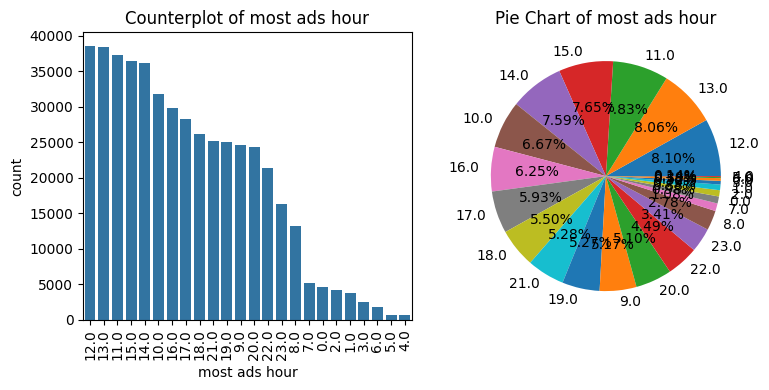

In [ ]:
variables = 'most ads hour'

#count plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(x = variables, data = df_cat, order = df_cat['most ads hour'].value_counts().index)
plt.title(f'Counterplot of {variables}')
plt.xticks(rotation=90)

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variables].value_counts()
plt.pie(counts,labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variables}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

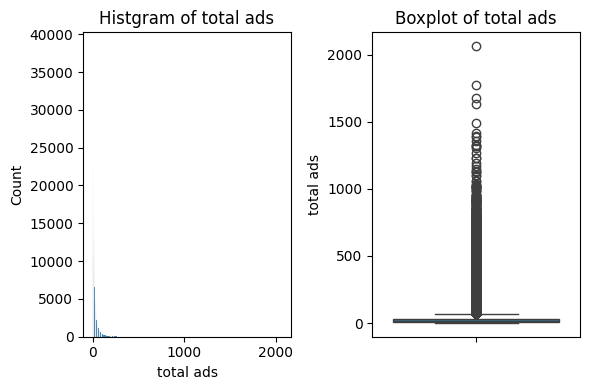

In [ ]:
variables = 'total ads'

#histogram
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x = variables, data = df)
plt.title(f'Histgram of {variables}')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(y = variables, data = df)
plt.title(f'Boxplot of {variables}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

In [ ]:
#check the descriptive stats of this feature
df['total ads'].describe()

,total ads
count,476472.000000
mean,28.505677
std,47.557230
min,1.000000
25%,6.000000
50%,15.000000
75%,32.000000
max,2065.000000


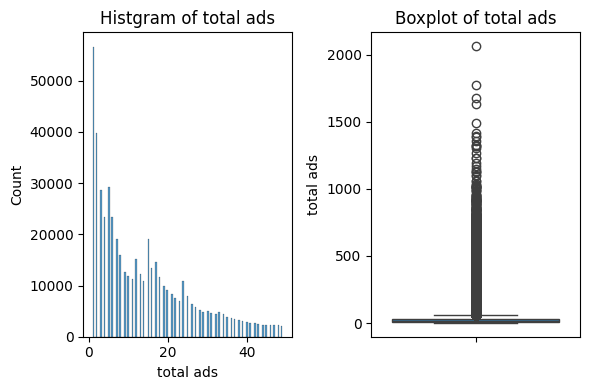

In [25]:
#filtering the data for a value close to 75th pecentile only for better visualization

variables = 'total ads'

#histogram
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x = variables, data = df[df['total ads'] < 50])
plt.title(f'Histgram of {variables}')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(y = variables, data = df)
plt.title(f'Boxplot of {variables}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

Bivariate Analysis

In [26]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [27]:
ct_conversation_test = pd.crosstab(df['test group'], df['converted'], normalize= 'index')
ct_conversation_test

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


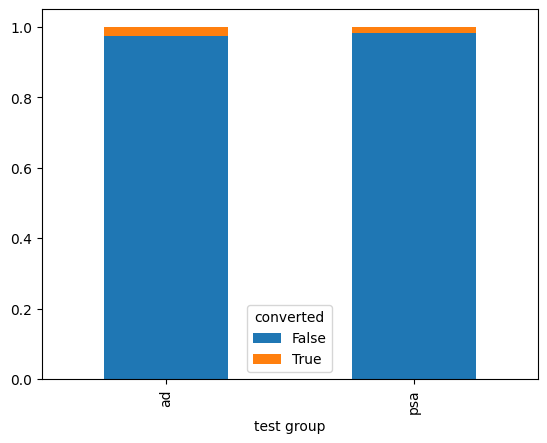

In [29]:
ct_conversation_test.plot.bar(stacked=True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


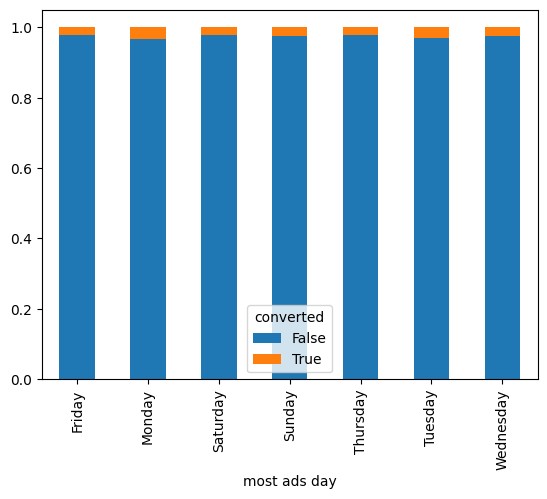

In [30]:
ct_conversation_day = pd.crosstab(df['most ads day'], df['converted'], normalize= 'index')
print(ct_conversation_day.sort_values(by = True, ascending = False))
ct_conversation_day.plot.bar(stacked=True);

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


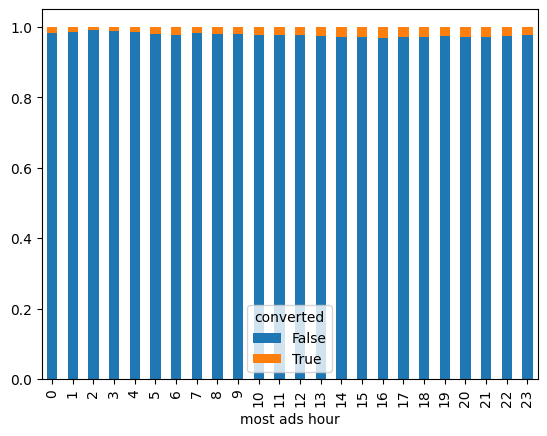

In [31]:
ct_conversation_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize= 'index')
print(ct_conversation_hour.sort_values(by = True, ascending = False))
ct_conversation_hour.plot.bar(stacked=True);

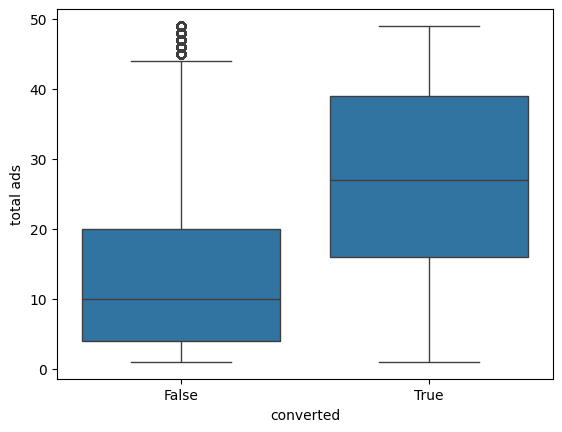

In [33]:
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 50]);

Statistical Tests

In [36]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variables in df_cat.columns:
  if variables != 'converted':
#create a contingency table(cross-tabulation)
    contingency_table = pd.crosstab(df_cat[variables], df['converted'])

#Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-square test for: {variables} Vs. converted")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

#check for signinficance
if p < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")


Chi-square test for: most ads hour Vs. converted
Chi-square value: 430.76869230822086
P-value: 8.027629823696771e-77
Reject the null hypothesis
